In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\HP\\regex2\\Machine_Learning\\Assignment_2\\covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [3]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
x_train,x_test,y_train,y_test=train_test_split(
    df.drop('has_covid',axis=1),df['has_covid'],test_size=0.2,random_state=42)


In [5]:
categorical_features=['gender','city']
numeric_features=['age','fever']

In [9]:
numeric_transformer=Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numeric_features),
        ('cat', categorical_transformer,categorical_features)
    ])

clf=Pipeline(steps=[('preprocessor',preprocessor),
                   ('classifier',LogisticRegression())])

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [10]:
y_pred

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No'],
      dtype=object)

In [ ]:
from sklearn.metrics 

In [11]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv("C:\\Users\\HP\\regex2\\Machine_Learning\\Assignment_2\\dsjob.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [13]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [14]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [15]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1670,no_enrollment,Graduate,15,1
1478,no_enrollment,Graduate,3,1
1528,Part time course,Graduate,7,1
1181,no_enrollment,Masters,17,1
278,no_enrollment,Masters,6,>4


In [16]:
df['education_level'].value_countsts()

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [17]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [18]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:>

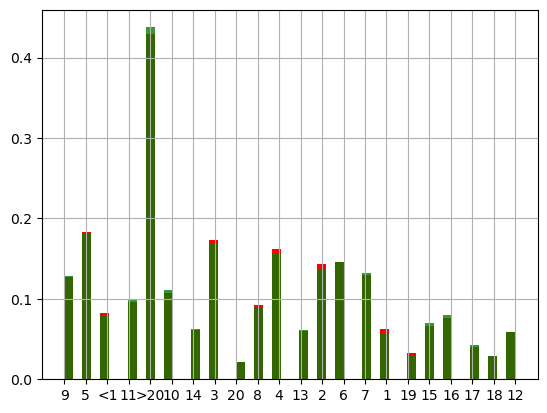

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['experience'].hist(bins=50, ax=ax, density=True,color='red')

new_df['experience'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [23]:
temp=pd.concat([
    
    df['enrolled_university'].value_counts()/len(df),
    
    new_df['enrolled_university'].value_counts()/len(new_df)
],
 axis=1)

temp.columns=['original','cca']
temp

,original,cca
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [25]:
#ML Models ===>
#(1). supervised ml model ==> labelled data
#(1). unsupervised ml model ==> unlabelled data


In [ ]:
#(1). supervised ml model ==> labelled data